In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Basic classification: Classify images of clothing

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.4


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


#### Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [5]:
print("train_images shape:",train_images.shape)
print("length of train_labels:",len(train_labels))
print("overview of train_labels",train_labels)
print("test_images shape:",test_images.shape)
print("overview of test_labels",len(test_labels))

train_images shape: (60000, 28, 28)
length of train_labels: 60000
overview of train_labels [9 0 0 ... 3 0 5]
test_images shape: (10000, 28, 28)
overview of test_labels 10000


## Preprocess the data

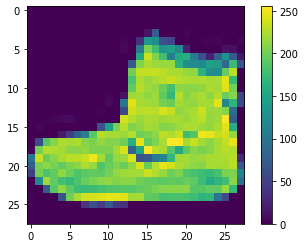

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

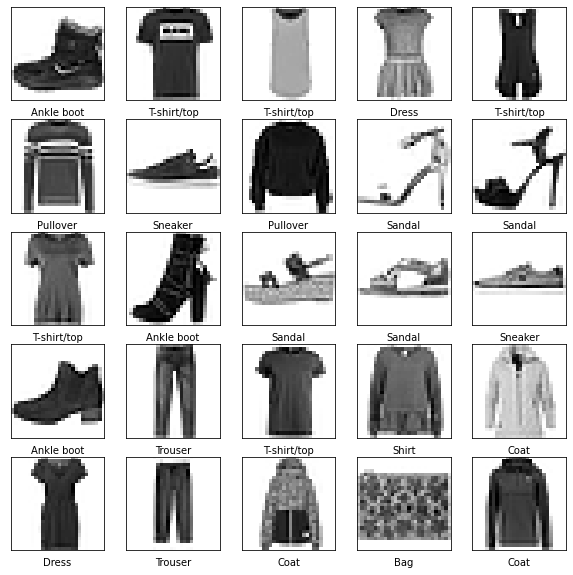

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-07-26 22:59:05.348654: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


## Compile the model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [11]:
model.fit(train_images, train_labels, epochs=10)

2022-07-26 22:59:05.857663: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3741 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

## Evaluate accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3338 - accuracy: 0.8870

Test accuracy: 0.8870000243186951


## Make predictions

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[0]

array([2.6105658e-06, 8.0795850e-09, 4.2237351e-09, 8.8598412e-08,
       1.3606808e-06, 2.9186861e-04, 5.1976326e-07, 6.4874388e-02,
       1.6547746e-06, 9.3482751e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## Verify predictions

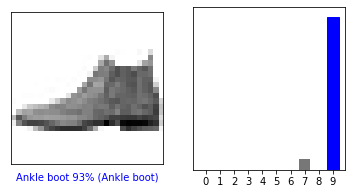

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

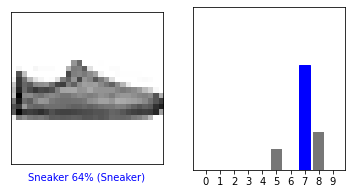

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

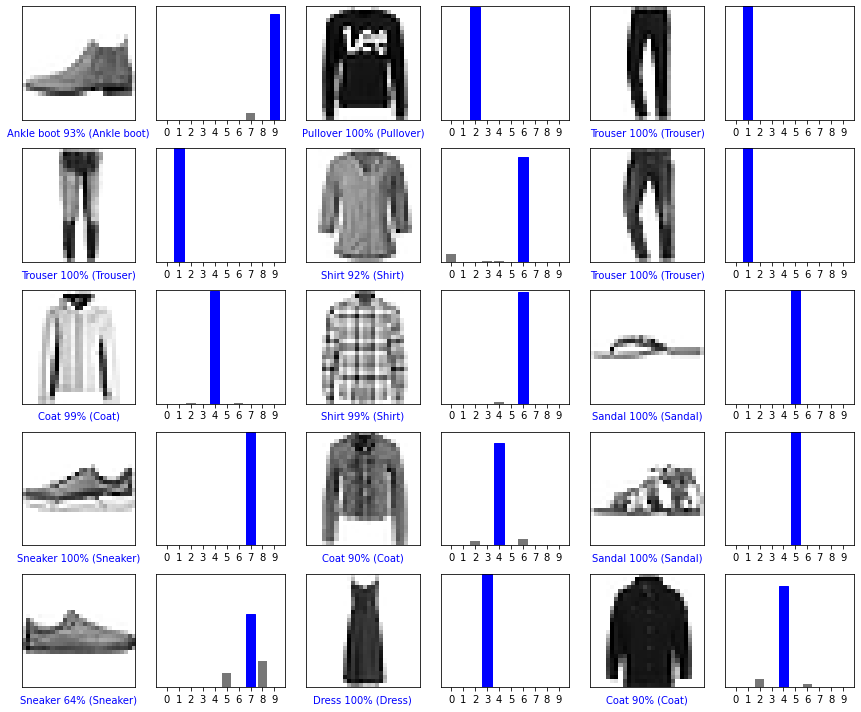

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [21]:
# Grab an image from the test dataset.
img = test_images[8]

print(img.shape)

(28, 28)


In [22]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.1649346e-05 2.6787706e-08 1.6472538e-07 1.6865529e-08 7.4260043e-09
  9.9995136e-01 1.0649826e-08 1.6432374e-05 3.4309329e-07 5.8921208e-11]]


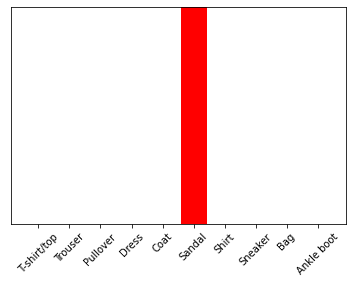

In [24]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [25]:
np.argmax(predictions_single[0])

5